#importing important libraries for this project

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error

#Reading train and test data

In [46]:
train_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car-train-data.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car-test-data.csv")

#Clean, Transfrom and Reduce Data
I viewed test and train data there is a `New_Price` column which is mostly Null values so we are droping it, also `Unnamed: 0` columns because there is no use of this

In [47]:
train_data.drop('New_Price',axis=1,inplace=True)
test_data.drop('New_Price',axis=1,inplace=True)

In [48]:
test_data.drop("Unnamed: 0",inplace=True,axis=1)
train_data.drop("Unnamed: 0",inplace=True,axis=1)

In [49]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


**Mileage Power Engine value is in numeric but there is unit written there we have to convert it into fully numeric**

In [50]:
train_data["Mileage"]=train_data["Mileage"].str.replace(" kmpl","")
train_data["Mileage"]=train_data["Mileage"].str.replace(" km/kg","")
train_data["Power"]=train_data["Power"].str.replace(" bhp","")
train_data["Engine"]=train_data["Engine"].str.replace(" CC","")

In [51]:
train_data.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [52]:
train_data=train_data[train_data["Mileage"].notna()]
train_data=train_data[train_data["Engine"].notna()]
train_data=train_data[train_data["Power"].notna()]
train_data=train_data[train_data["Seats"].notna()]
train_data = train_data.reset_index(drop=True)

In [53]:
len(train_data)

5975

In [54]:
train_data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

**No null values now so convert values into numeric**

In [55]:
train_data["Mileage"]=train_data["Mileage"].astype(float)
train_data["Engine"]=train_data["Engine"].astype(float)

**There are some value like null in Power columns so we have to remove it.**

In [56]:
remove_pos=[]
for i in range(0,train_data.shape[0]):
    if(train_data["Power"][i]=='null'):
        remove_pos.append(i)
        # print(i,end=' ')

In [57]:
train_data=train_data.drop(remove_pos,axis=0)

In [58]:
train_data=train_data.reset_index(drop=True)

In [59]:
train_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [60]:
train_data["Power"]=train_data["Power"].astype(float)

In [61]:
train_data.drop("Location",axis=1,inplace=True)

In [62]:
company=train_data["Name"].str.split(" ",expand=True)

In [63]:
train_data["Name"]=company[0]

In [64]:
train_data.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

**Preparing a dictionary which will pass through `replace` function in our data set to replace string representation of some features into some comparable numerical values**

In [65]:
replace_dict={
        "Fuel_Type":{
            "CNG":1,
            "Diesel":2,
            "Petrol":3,
            "LPG":4
        },
        "Transmission":{
            "Manual":1,
            "Automatic":2,
        },
        "Owner_Type":{
            "First":1,
            "Second":2,
            "Fourth & Above":4,
            "Third":3
        }
}

In [66]:
train_data.replace(replace_dict,inplace=True)

In [67]:
train_data.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,2010,72000,1,1,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai,2015,41000,2,1,1,19.67,1582.0,126.20,5.0,12.50
2,Honda,2011,46000,3,1,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti,2012,87000,2,1,1,20.77,1248.0,88.76,7.0,6.00
4,Audi,2013,40670,2,2,2,15.20,1968.0,140.80,5.0,17.74


In [68]:
train_data["Price"]=train_data["Price"]*1e5 #Price in lakhs

Now Our Most of data is converted into numeric values



#Few plots to analayse data

[Text(0.5, 1.0, 'Owner_Type vs Price')]

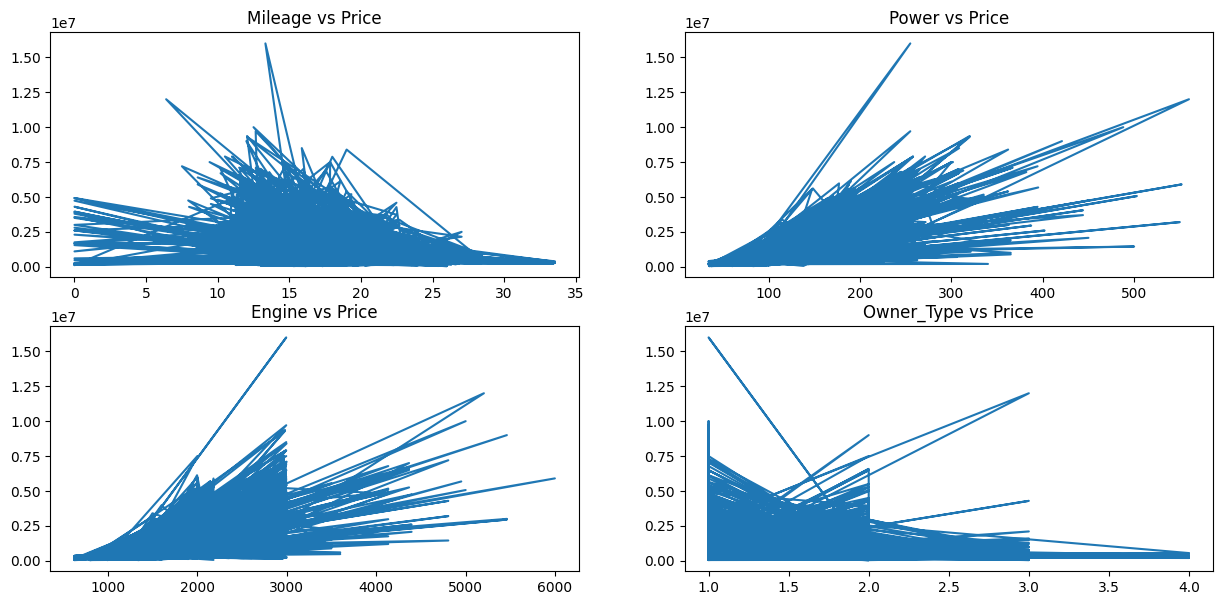

In [69]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,7))
ax[0,0].plot(train_data.Mileage,train_data.Price)
ax[0,0].set(title="Mileage vs Price")

ax[0,1].plot(train_data.Power,train_data.Price)
ax[0,1].set(title="Power vs Price")

ax[1,0].plot(train_data.Engine,train_data.Price)
ax[1,0].set(title="Engine vs Price")

ax[1,1].plot(train_data.Owner_Type,train_data.Price)
ax[1,1].set(title="Owner_Type vs Price")

Prepare X and Y data

In [70]:
X=train_data.drop("Price",axis=1)
Y=train_data["Price"]

#convert categorical features into numeric

In [71]:
cat_feature=["Name"]
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,cat_feature)],remainder="passthrough")
train_X=transformer.fit_transform(X)

In [72]:
x_tr,x_te,y_tr,y_te=train_test_split(train_X,Y,test_size=0.2)

#prepare model
* choose model
*  train model
*   check r2 score and accuracy score

In [73]:
def  Model(model,x_train,y_train,x_test,y_test):
    for key,value in model.items():
        print(key)
        value.fit(x_train,y_train)
        y_pred=value.predict(x_test)
        y_pred.shape
        print(f"{key } r2 score is {r2_score(y_pred,y_test)} and Mean squared error is {mean_squared_error(y_pred,y_test)}")
    return

In [74]:
model={
    "Ridge":Ridge(alpha=0.5),
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(n_estimators=100)
}
Model(model,x_tr,y_tr,x_te,y_te)

Ridge
Ridge r2 score is 0.6619598897543131 and Mean squared error is 288154855384.60205
LinearRegression
LinearRegression r2 score is 0.609848723008374 and Mean squared error is 319483891309.5638
RandomForestRegressor
RandomForestRegressor r2 score is 0.90719260502098 and Mean squared error is 93974009032.08932


1.  Ridge

In [75]:
reg1=Ridge(alpha=0.5)
reg1.fit(x_tr,y_tr)
y_pred=reg1.predict(x_te)
r2_score(y_pred,y_te)

0.6619598897543131

2. LinearRegression

In [76]:
reg2=LinearRegression()
reg2.fit(x_tr,y_tr)
y_pred2=reg2.predict(x_te)
r2_score(y_pred2,y_te),

(0.609848723008374,)

3.  RandomForestRegressor


In [77]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_tr,y_tr)
y_pred=model.predict(x_te)
r2_score(y_pred,y_te)

0.9102461744293716

Best performed model is RandomForestRegressor ✅ with r2_score of 0.910246 which is a good accuracy.
